In [ ]:
__author__ = "Alireza Sadabadi"
__copyright__ = "Copyright (c) 2025 Alireza Sadabadi. All rights reserved."
__credits__ = ["Alireza Sadabadi"]
__license__ = "Apdtache"
__version__ = "2.0"
__maintainer__ = "Alireza Sadabadi"
__email__ = "alirezasadabady@gmail.com"
__status__ = "Test"
__doc__ = "you can see the tutorials in https://youtube.com/@alirezasadabadi?si=d8o7LK_Ai1Hf68is"

In [9]:
import pandas as pd
df = pd.read_csv("EURUSDH4.csv")
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2018-12-24 04:00:00,1.13800,1.13924,1.13776,1.13905,4639,4,0
1,2018-12-24 08:00:00,1.13907,1.14080,1.13741,1.13947,10011,4,0
2,2018-12-24 12:00:00,1.13947,1.14173,1.13885,1.14136,11859,4,0
3,2018-12-24 16:00:00,1.14135,1.14382,1.13995,1.14090,28658,4,0
4,2018-12-24 20:00:00,1.14088,1.14213,1.14072,1.14162,3104,6,0
...,...,...,...,...,...,...,...,...
9995,2025-05-28 16:00:00,1.13114,1.13245,1.12837,1.12943,15170,0,0
9996,2025-05-28 20:00:00,1.12942,1.13010,1.12843,1.12922,7077,2,0
9997,2025-05-29 00:00:00,1.12938,1.12966,1.12103,1.12344,11751,2,0
9998,2025-05-29 04:00:00,1.12341,1.12568,1.12240,1.12480,10187,2,0


In [10]:
import numpy as np
import pandas_ta as pdta
df['ATR'] = pdta.atr(df['high'],df['low'],df['close'],length=20)
df['RSI'] = pdta.rsi(df['close'])
df['MA40'] = pdta.sma(df['close'],length=40)
df['MA80'] = pdta.sma(df['close'],length=80)
df['MA160'] = pdta.sma(df['close'],length=160)
df["CCI"] = pdta.cci(df.high, df.low, df.close, length=16)
df["AO"] = pdta.ao(df.high, df.low)
df["MOM"] = pdta.mom(df.close, length=16)
a = pdta.macd(df.close)
df = df.join(a)
df["BOP"] = pdta.bop(df.open, df.high, df.low, df.close, length=16)
df["RVI"] = pdta.rvi(df.close)
a = pdta.dm(df.high, df.low, length=16)
df = df.join(a)
a = pdta.stoch(df.high, df.low, df.close)
df = df.join(a)
a = pdta.stochrsi(df.close, length=16)
df = df.join(a)
df["WPR"] = pdta.willr(df.high, df.low, df.close, length=16)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 10000 non-null  object 
 1   open                 10000 non-null  float64
 2   high                 10000 non-null  float64
 3   low                  10000 non-null  float64
 4   close                10000 non-null  float64
 5   tick_volume          10000 non-null  int64  
 6   spread               10000 non-null  int64  
 7   real_volume          10000 non-null  int64  
 8   ATR                  9980 non-null   float64
 9   RSI                  9986 non-null   float64
 10  MA40                 9961 non-null   float64
 11  MA80                 9921 non-null   float64
 12  MA160                9841 non-null   float64
 13  CCI                  9985 non-null   float64
 14  AO                   9967 non-null   float64
 15  MOM                  9984 non-null   

In [12]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
tp = 10*1e-4
sl = tp/1.5

def Target(numberOfNextCandles, df):
    open = list(df['open'])
    high = list(df['high'])
    low = list(df['low'])
    dfLength = len(df)
    trend = [None] * dfLength
    
    # cc = current candle
    for cc in range (0,dfLength-numberOfNextCandles-2):
        # VOL = value open low
        # VOH = value open high
        VOL = 0
        VOH = 0
        for i in range(1,numberOfNextCandles+2):
            #o_l = open - low
            #o_h = open - high
            o_l = open[cc+1]-low[cc+i]
            o_h = open[cc+1]-high[cc+i]
            VOL = max(o_l, VOL)
            VOH = min(o_h, VOH)

            if ((-VOL <= -tp) and (-VOH < sl)):
                trend[cc] = 1 # downtrend
                break
            if ((VOL > -sl) and (-VOH >= tp)):
                trend[cc] = 2 # uptrend
                break
            else:
                trend[cc] = 0 # range
            
    return trend

<Axes: >

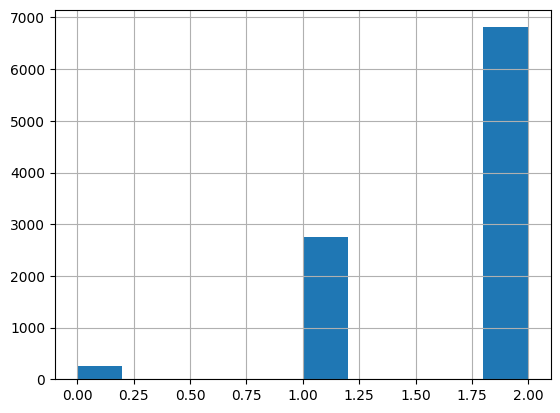

In [27]:
df['Target'] = Target(20, df)
df['Target'].hist()

In [28]:
df['Target'] = Target(15, df)
df.value_counts('Target')

Target
2.0    6775
1.0    2744
0.0     305
Name: count, dtype: int64

In [29]:
df_model = df[['ATR', 'RSI', 'MA40', 'MA80', 'MA160', 'CCI', 'AO', 'MOM',
               'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR', 'Target']] 
df_model = df_model.dropna()

attributes=['ATR', 'RSI', 'MA40', 'MA80', 'MA160', 'CCI', 'AO', 'MOM',
               'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR']
X = df_model[attributes]
y = df_model["Target"]

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)

print("-------XGBOOST-------")
print("Accuracy train: {:.2%}".format(accuracy_train))
print("Accuracy test: {:.2%}".format(accuracy_test))

-------XGBOOST-------
Accuracy train: 97.92%
Accuracy test: 66.49%


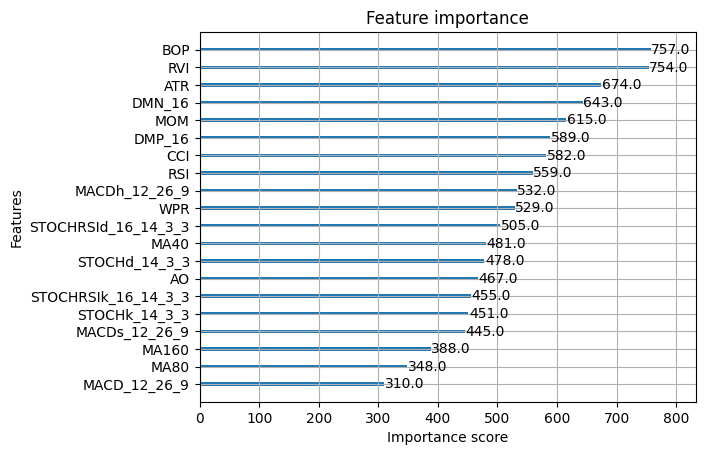

In [31]:
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(model)
pyplot.show()